In [9]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.cluster import KMeans
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 14.2 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

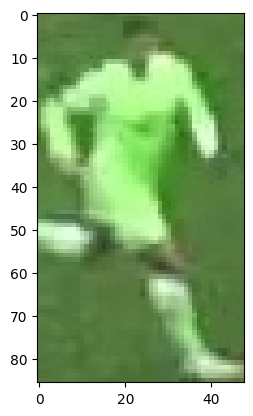

In [13]:
plt.imshow(image)
plt.show()

## take the top half of the image

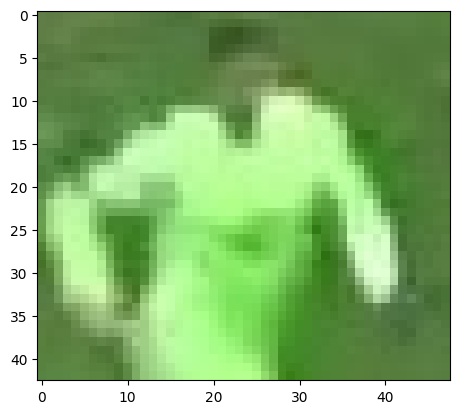

In [14]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

## Cluster the image into two clusters

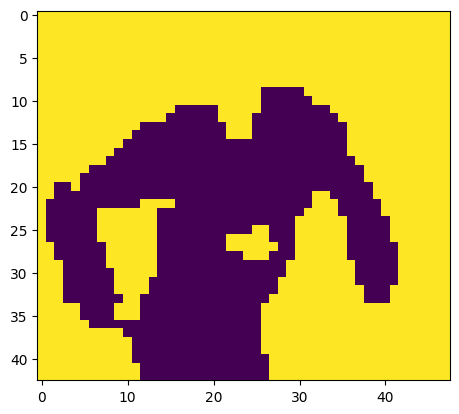

In [15]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [17]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [18]:
kmeans.cluster_centers_[player_cluster]

array([170.28929987, 235.7331572 , 142.1321004 ])